# identify thing that can be analysis with regression


- Supervised learing : where we use input data to predict label for the data 
- UnSupervised learing : Clustering data based on common characteristics
**simple liner reg. of only two quantitative varables**

# Correlation coefficients
- 0.7 =< r < 1.0 : strong
- 0.3 <= r < 0.7 : moderate
- 0.0 < r < 0.3 : Weak

# How to fit a line?

- ( Intercept)  : tell us the expect value of the response when the explanotary variable 0

- (Slop) : tell us expected chance in the response for each 1 unit increase in the explanatory variable
- (least squares algorithm) : minimize the sum of the squared vertical distance from the line to points

In [39]:
import numpy as np
import pandas as pd
import seaborn as sb
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("house_price_area_only.csv")
df.head()

,Unnamed: 0,price,area
0,0,598291,1188
1,1,1744259,3512
2,2,571669,1134
3,3,493675,1940
4,4,1101539,2208


In [2]:
# before we fit our model we need to add a column for our intercept
df['intercept'] = 1

# here we provides OLS method (x,y) variables

lm = sm.OLS(df['price'],df[['intercept','area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:44:34   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# coef	std err	t	P>|t|	[0.025	0.975]

**right here is area that tells us about model we fit (intercept and Slope)**
- the predicted house price is equal  to y = (9587.8878) + (348.4664 * the area of the house)
- ex: if the home had a area of zero we predict the model will cost 9587 for each unit increase the price will increase by 348
- unit of all data must be consistent to get right resulta


# P>|t|

- p value in regression are always given for testing a parameters for intercept or slop equal to zero and the null hypothesis 
- EX: this p value gives  whether or not a particular variable is useful for prediction the respone 
- the p value here (0.000) on the intercept isnt as usful as this  0.209 which suggests that area is stat. significant in relating to the price 

# R-squared: the closer the value to 1 the better it fit

- the amount of variability in the response (Y) explained by your model
- above we can say that 67.8%of the varibility in price is explanied by house
- the remainig 33% of the varibility is due to chatacteristics of the home that are not the area 



# Mulitiple liner regression :

In [23]:
df = pd.read_csv('house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [24]:
df['intercept'] = 1
lm = sm.OLS(df['price'],df[['intercept','bathrooms','bedrooms','area']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        04:51:03   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **if we saw area 345.9110 : we would say for each additional unit increase in the area of the house the prince expected to increase by 345 if all other factors stay the same**


### Dummy variables

- **it used to be able to analysis catigorcal data**


In [25]:
df = pd.read_csv('house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [26]:
# this will create dummpy to  neighberhood
neighborhood_dummies = pd.get_dummies(df['neighborhood'])
df_new = df.join(neighborhood_dummies)
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C
0,1112,B,1188,3,2,ranch,598291,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,1,0
2,5952,B,1134,3,2,ranch,571669,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,0
4,5108,B,2208,6,4,victorian,1101539,0,1,0


`1.` Use the [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) documentation to assist you with obtaining dummy variables for the **neighborhood** column.  Then use [join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) to add the dummy variables to your dataframe, **df**, and store the joined results in **df_new**.

Fit a linear model using **all three levels** of **neighborhood** neighborhood to predict the price. Don't forget an intercept.

In [28]:
df_new['intercept'] = 1
lm = sm.OLS(df_new['price'],df_new[['intercept','A','B','C']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        04:55:51   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.381e+05   4439.653    121.210      0.000    5.29e+05    5.47e+05
A           3001.8311   8650.726      0.347      0.729    -1.4e+04       2e+04
B           5.325e+05   7894.313     67.448      0.000    5.17e+05    5.48e+05
C           2669.4717   8925.271      0.299      0.765   -1.48e+04    2.02e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                     1.32e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

`2.`  Now, fit an appropriate linear model for using **neighborhood** to predict the price of a home. Use **neighborhood A** as your baseline


In [29]:
lm2 = sm.OLS(df_new['price'],df_new[['intercept','B','C']])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        04:58:45   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`3.` Run the two cells below to look at the home prices for the A and C neighborhoods.  Add neighborhood B.  This creates a glimpse into the differences that you found in the previous linear model.

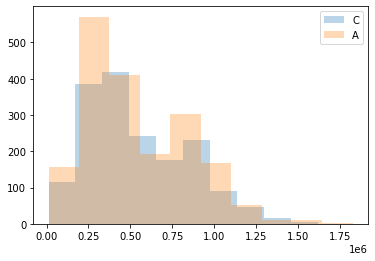

In [32]:
plt.hist(df_new.query("C == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df_new.query("A == 1")['price'], alpha = 0.3, label = 'A');

plt.legend();

add dummy variables for the **style** of house, as well as **neighborhood**.  Use **ranch** as the baseline for the **style**.  Additionally, add **bathrooms** and **bedrooms** to your linear model.  Don't forget an intercept.  Use the results of your linear model to answer the last two questions below. **Home prices are measured in dollars, and this dataset is not real.**

In [37]:
type_dummies = pd.get_dummies(df_new['style'])
df_new = df_new.join(type_dummies)
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,intercept,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,0,1,0,1,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,1,0,1,0,0,1
2,5952,B,1134,3,2,ranch,571669,0,1,0,1,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,0,1,0,1,0
4,5108,B,2208,6,4,victorian,1101539,0,1,0,1,0,0,1


In [38]:
lm3 = sm.OLS(df_new['price'], df_new[['intercept', 'B', 'C', 'lodge', 'victorian', 'bedrooms', 'bathrooms']])
results3 = lm3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:05:41   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.833e+05    1.2e+04    -31.995      0.000   -4.07e+05    -3.6e+05
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
lodge       1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
victorian   7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### neighborhood b is the most expensive a second c third , there are stat. significant home price B differs from average home price in neighborhood A


- **(R-squared:	0.809) % of the variability in price can be explained by the linear model built using bedrooms, bathrooms, neighborhood, and home style.**

- **For every additional bedroom a home has we can expect the price to increase by 173200
, holding all other variables constant.**

- **For every additional bathroom a home has we can expect the price to increase by 99960, holding all other variables constant.**

- **We expect that a victorian house will cost 70560 more than a ranch house, all else being equal.**

- **We expect that a house in neighborhood C will cost 7168 less than a neighborhood A house, all else being equal.**

# Multicollinearity & VIFS


In [41]:
df= pd.read_csv('house_prices.csv')

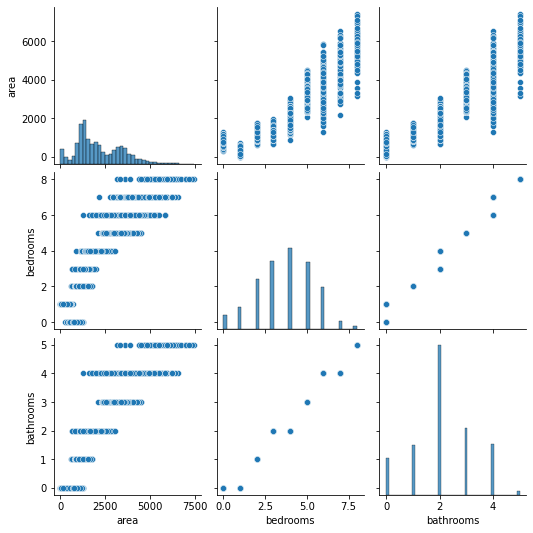

In [43]:
# use seaborn to see relations between our varaibles 
# ypu will see very strong relations below 
sb.pairplot(df[['area','bedrooms','bathrooms']])

**Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.**

### Steps for Implementing VIF
- Run a multiple regression.
- Calculate the VIF factors.
- Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

In [51]:
Y , X = dmatrices('price ~ area + bedrooms + bathrooms',df,return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


### identify Multicollinearity : - Scatterplot Matris - VIFS

- IF you have larger than ten for a VIF then we have Multicollinearity in the model 

we would like x-variables to be related to the response, but not to be related to one another. When our x-variables are correlated with one another, this is known as multicollinearity. Multicollinearity has two potential negative impacts. As you saw in the previous example,

The expected relationships between your x-variables and the response may not hold when multicollinearity is present. That is, you may expect a positive relationship between the explanatory variables and the response (based on the bivariate relationships), but in the multiple linear regression case, it turns out the relationship is negative.

Our hypothesis testing results may not be reliable. It turns out that having correlated explanatory variables means that our coefficient estimates are less stable. That is, standard deviations (often called standard errors) associated with your regression coefficients are quite large. Therefore, a particular variable might be useful for predicting the response, but because of the relationship it has with other x-variables, you will no longer see this association.
We have also looked at two different ways of identifying multicollinearity:

Looking at the correlation of each explanatory variable with each other explanatory variable (with a plot or the correlation coefficient).
Looking at VIFs for each variable.
When VIFs are greater than 10, this suggests that multicollinearity is certainly a problem in your model. Some experts even suggest that VIFs of greater than 5 can be problematic. In most cases, not just one VIF is high, but rather many VIFs are high, as these are measures of how related variables are with one another.

The most common way of working with correlated explanatory variables in a multiple linear regression model is simply to remove one of the variables that is most related to the other variables. Choosing an explanatory variable that you aren't interested in, or isn't as important to you, is a common choice.



## Remove bathrooms from your above model.  Refit the multiple linear regression model and re-compute the VIFs.  Use the final quiz below to provide insights about your results.

In [53]:

df['intercept'] = 1

lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:53:57   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
y, X = dmatrices('price ~ area + bedrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 

In [55]:
vif

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


- it appears that the predictor variables are correlated woth one another 
- the variables that appear to be most correlated are the number of bedrooms and bathrooms
- we must remove bedrooms or bathrooms becasue they both have VIFS greater than 10 


### Higher Order Terms
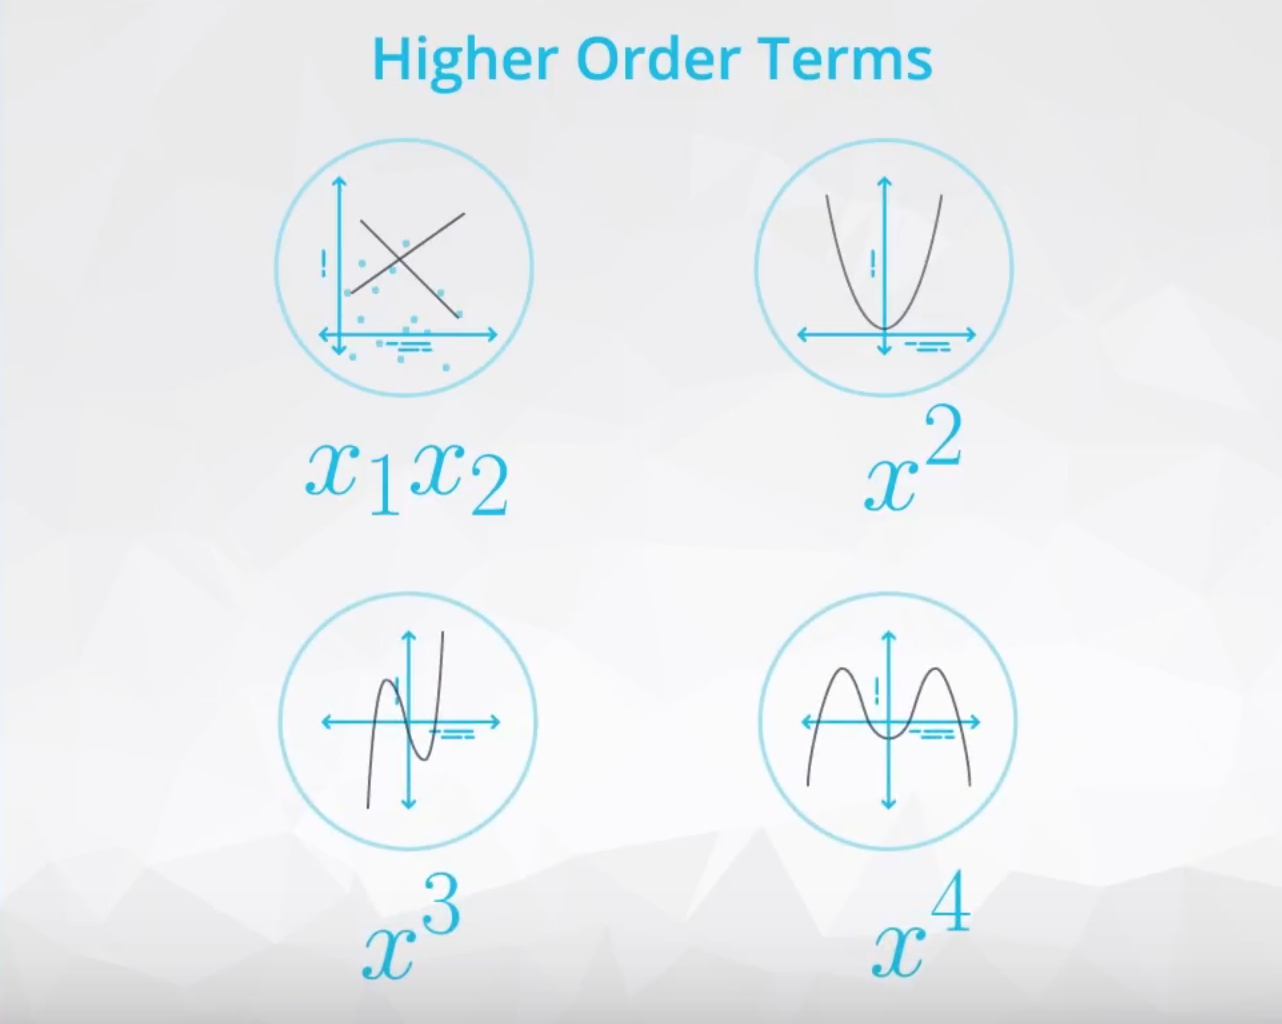

 general, these terms can help you fit more complex relationships in your data. However, they also take away from the ease of interpreting coefficients, as we have seen so far. You might be wondering: "How do I identify if I need one of these higher order terms?"

When creating models with quadratic, cubic, or even higher orders of a variable, we are essentially looking at how many curves there are in the relationship between the explanatory and response variables.

If there is one curve, like in the plot below, then you will want to add a quadratic. Clearly, we can see a line isn't the best fit for this relationship.

https://tamino.wordpress.com/2011/03/31/so-what/

# logistic Regression

In [57]:
df = pd.read_csv('fraud_dataset.csv')
df.head()

,transaction_id,duration,day,fraud
0,28891,21.302600,weekend,False
1,61629,22.932765,weekend,False
2,53707,32.694992,weekday,False
3,47812,32.784252,weekend,False
4,43455,17.756828,weekend,False


In [59]:
# creating dummy varables

df[['no_fraud','fraud']] = pd.get_dummies(df['fraud'])

df.head()

,transaction_id,duration,day,fraud,no_fraud
0,28891,21.302600,weekend,0,1
1,61629,22.932765,weekend,0,1
2,53707,32.694992,weekday,0,1
3,47812,32.784252,weekend,0,1
4,43455,17.756828,weekend,0,1


In [60]:
# drop no_fraud

df = df.drop('no_fraud',axis=1)


In [61]:
# Logit regression 

df['intercept'] = 1
logit_mod = sm.Logit(df['fraud'], df[['intercept','duration']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 16


C:\Users\fadyt\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\fadyt\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\fadyt\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\fadyt\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  fraud   No. Observations:                 8793
Model:                          Logit   Df Residuals:                     8791
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Oct 2022   Pseudo R-squ.:                     inf
Time:                        10:32:26   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.3827      1.756      5.912      0.000       6.940      13.825
duration      -1.3404      0.237     -5.649      0.000      -1.805      -0.875
==============================================================================

Possibly complete quasi-separation: A fraction 0.97 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

`1.` As you can see, there are two columns that need to be changed to dummy variables.  Replace each of the current columns to the dummy version.  Use the 1 for `weekday` and `True`, and 0 otherwise.  Use the first quiz to answer a few questions about the dataset.

In [62]:
df['weekday'] = pd.get_dummies(df['day'])['weekday']
df[['not_fraud','fraud']] = pd.get_dummies(df['fraud'])
df = df.drop('not_fraud', axis=1)

In [63]:
#the proportion of fraudulent transactions
print(df['fraud'].mean())
#the proportion of fraudulent transactions in weekends
print(df['weekday'].mean())
# The average duration for non-fraudulent transactions. 
#vs The average duration for fraudulent transaction.
print(df.groupby('fraud').mean()['duration'])

0.012168770612987604
0.3452746502900034
fraud
0    30.013583
1     4.624247
Name: duration, dtype: float64


`2.` Now that you have dummy variables, fit a logistic regression model to predict if a transaction is fraud using both day and duration.  Don't forget an intercept!  Use the second quiz below to assure you fit the model correctly.

In [65]:
df['intercept'] = 1
log_mod = sm.Logit(df['fraud'], df[['intercept', 'duration', 'weekday']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 16


C:\Users\fadyt\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\fadyt\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\fadyt\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\fadyt\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  fraud   No. Observations:                 8793
Model:                          Logit   Df Residuals:                     8790
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                     inf
Time:                        10:20:06   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.8709      1.944      5.078      0.000       6.061      13.681
duration      -1.4637      0.290     -5.039      0.000      -2.033      -0.894
weekday        2.5465      0.904      2.816      0.005       0.774       4.319
==============================================================================

Possibly complete quasi-separation: A fraction 0.98 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**result from above logit reg.**
- for each minute less spent on transaction the chance of fraud happen 4.32 times more likely 
holding the day of week 
- form p value we can say that both duration and weekend are both stat. signifcant in predicting if transction is fraud or not 


#### to be able to interpreted the coef above 


In [67]:
# Fraud is 12.76 times as likely on weekdays than weekends holding all else constant
# for each 1 unit increase in duration fraud is 0.23 times as likely holding all else constant
# for each 1 unit decrease in duration fraud is 4.32 tomes as likely holding all else constant

np.exp(-1.4637),np.exp(2.5465)

(0.2313785882117941, 12.762357271496972)

In [71]:
df = pd.read_csv("admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [73]:
df['prestige'].value_counts()

2    148
3    121
4     67
1     61
Name: prestige, dtype: int64

With the above idea in place, create the dummy variables needed to change prestige to a categorical variable, rather than quantitative

In [77]:
df[['prest_1','prest_2','prest_3','prest_4']] = pd.get_dummies(df['prestige'])

In [79]:
df.head()

,admit,gre,gpa,prestige,prest_1,prest_2,prest_3,prest_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


#####  fit a logistic regression model to predict if an individual is admitted using gre, gpa, and prestige with a baseline of the prestige value 

In [85]:
df['intercept'] = 1

logit_mod = sm.Logit(df['admit'], df[['intercept','gre', 'gpa', 'prest_2', 'prest_3', 'prest_4']])
result = logit_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                 0.08166
Time:                        10:40:54   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
Covariance Type:            nonrobust   LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8769      1.142     -3.393      0.001      -6.116      -1.638
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
prest_2       -0.6801      0.317     -2.146      0.032      -1.301      -0.059
prest_3       -1.3387      0.345     -3.882      0.000      -2.015      -0.663
prest_4       -1.5534      0.417     -3.721      0.000      -2.372      -0.735
==============================================================================
"""

In [86]:
np.exp(result.params)

intercept    0.020716
gre          1.002221
gpa          2.180027
prest_2      0.506548
prest_3      0.262192
prest_4      0.211525
dtype: float64

In [87]:
1/_

intercept    48.272116
gre           0.997784
gpa           0.458710
prest_2       1.974147
prest_3       3.813995
prest_4       4.727566
dtype: float64

In [88]:
df.groupby('prestige').mean()['admit']

prestige
1    0.540984
2    0.358108
3    0.231405
4    0.179104
Name: admit, dtype: float64

- If an individual attended the most prestigious alma mater, they are prest_4: 4.727566 more likely to be admitted than if they attended the least prestigious, holding all other variables constant.
- If an individual attended the most prestigious alma mater, they are prest_3 : 3.813995 more likely to be admitted than if they attended the second lowest in prestigious-ness, holding all other variables constant.
- For every one point increase in gpa, an individual is 2.18 more likely to be admitted, holding all other variables constant.







### when determining how well your logistics regression model is doing at predicting the correct labels
- Accuracy (number of correct labels over number of rows ) not work if we have large class imbalances in data 


### Model Diagnostics in Python - Part I


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,accuracy_score,confusion_matrix

In [91]:

df = pd.read_csv("admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [95]:
# split data to train and test data 

y = df['admit']
# dummy variables
df[['level1','level2','level3','level4',]] = pd.get_dummies(df['prestige'])

x = df[['gre','gpa','level1','level2','level3']] 

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.10,random_state=42)

In [96]:
log_mod = LogisticRegression()
log_mod.fit(x_train,y_train)
y_predict = log_mod.predict(x_test)

print(precision_score(y_test,y_predict))

print(recall_score(y_test,y_predict))

print(accuracy_score(y_test,y_predict))

confusion_matrix(y_test,y_predict)

0.3333333333333333
0.0625
0.575


C:\Users\fadyt\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[22,  2],
       [15,  1]], dtype=int64)

In [100]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
np.random.seed(42)

df = pd.read_csv('admissions.csv')
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [101]:
df[['prest_1', 'prest_2', 'prest_3', 'prest_4']] = pd.get_dummies(df['prestige'])
X = df.drop(['admit', 'prestige', 'prest_1'] , axis=1)
y = df['admit']
X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.20, random_state=0)

In [102]:
log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)
preds = log_mod.predict(X_test)
confusion_matrix(y_test, preds) 

C:\Users\fadyt\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[56,  0],
       [20,  4]], dtype=int64)

In [103]:
precision_score(y_test, preds) 

1.0

In [104]:
recall_score(y_test, preds)

0.16666666666666666

In [105]:
accuracy_score(y_test, preds)

0.75

- The number of non-admits correctly identified as non-admits : 56
- The number of admits correctly identified as admits. :2
- The number of admits incorrectly identified as non-admits. : 22
- The number of non-admits incorrectly identified as admits. : 0
- If we really care about correctly identifying the accepted students as accepted, which metric do we care about the most?  (recall)
- If we only care obtaining the most correctly identified cases whether accepted or non-accepted, which metric do we care about the most? (Accuracy)


- What was the recall for the test data? : 0.083
- What was the precision for the test data?  : 1.0